In [1]:
import tensorflow as tf
print('tf_version', tf.__version__)

tf_version 2.11.0


In [2]:
from tensorflow.keras.layers import  Input, SimpleRNN, LSTM, GRU, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Read Dataset

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print('x_train.shape: ', x_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)


Build Model

In [8]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i,x)


Compile and Train Model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy']
              )
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 110s 57ms/step - loss: 0.3279 - accuracy: 0.8943 - val_loss: 0.1195 - val_accuracy: 0.9647
Epoch 2/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1009 - accuracy: 0.9688 - val_loss: 0.0928 - val_accuracy: 0.9723
Epoch 3/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0695 - accuracy: 0.9792 - val_loss: 0.0650 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0554 - accuracy: 0.9837 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.0525 - val_accuracy: 0.9846
Epoch 6/10
1338/1875 [====================>.........] - ETA: 20s - loss: 0.0383 - accuracy: 0.9889

Evaluation

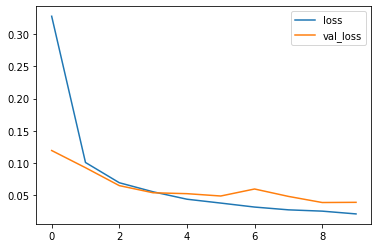

In [11]:
#Plot loss per iteration
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()

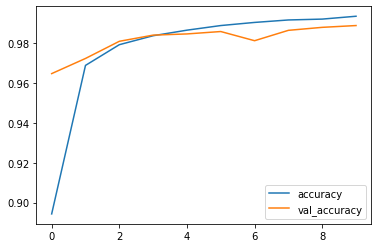

In [13]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label="accuracy")
plt.plot(r.history['val_accuracy'], label="val_accuracy")
plt.legend()

Confusion Matrix

313/313 [==============================] - 8s 21ms/step
Confusion matrix, without normalization
[[ 972    0    1    1    0    0    3    2    1    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   1    0 1028    1    1    0    1    0    0    0]
 [   0    0    3 1002    0    2    0    1    1    1]
 [   0    0    2    0  970    0    8    0    1    1]
 [   0    1    0    9    0  875    2    1    1    3]
 [   2    2    0    0    1    4  947    0    2    0]
 [   0    4    8    1    0    0    0 1014    1    0]
 [   0    0    2    4    0    3    0    1  962    2]
 [   0    0    0    0   11    3    0    7    3  985]]


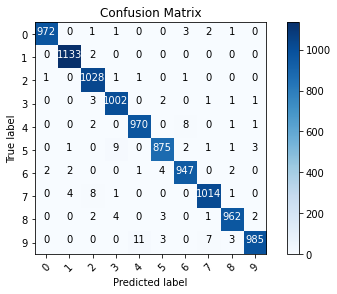

In [14]:
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues):
    """
    This funciton pronts out confusion matrix
    Normalization can be applied by setting 'nomalize=True
    """

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion metrix")

    else:
      print('Confusion matrix, without normalization')
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i,j], fmt),
               horizontalalignment="center",
               color="white" if cm[i,j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 3 PredictedL 2')

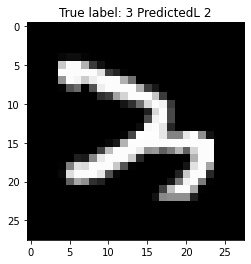

In [15]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s PredictedL %s" % (y_test[i], p_test[i]))